### TODO
* get_target_category_by_column 加入各類別總次數

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from collections import Counter
from src.modules import EDA

pd.set_option('display.max_columns', None)
plt.subplots_adjust(wspace=10, hspace=0)

In [2]:
train_path = 'data/train.csv'
test_path = 'data/test.csv'

eda = EDA(train_path, test_path)

## (0) fraud_ind (target)
* 只有約1.35%為盜刷

In [3]:
print(eda.group_by_target.get_group(1).shape[0])
print(eda.group_by_target.get_group(0).shape[0])
print(20355 / 1501432)

20355
1501432
0.013557057529078907


In [28]:
eda.train_data.shape

(1521787, 24)

## (1) acqic 收單行代碼
### featire engineering
* intersection
* target encoding

In [4]:
eda.check_na('acqic')

Train :  [False]
Test  :  [False]


In [5]:
eda.get_num_unique('acqic')

Colname :　acqic
Number of train unique : 6051
Number of test unique  : 3748


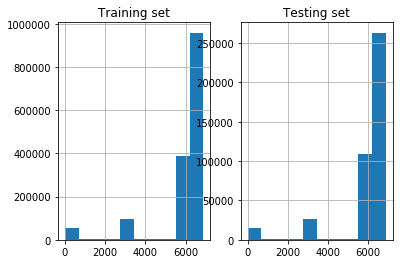

In [47]:
eda.hist('acqic')

In [7]:
eda.get_num_intersection('acqic')

Number of intersection category: 2933
Intersection Ratio : 
Train : 0.4847132705337961
Test  : 0.7825506937033084


In [8]:
len(eda.get_union('acqic'))

6866

In [4]:
eda.get_target_category_by_column('acqic', 10)

[(3348, 4031),
 (3221, 2455),
 (6215, 2080),
 (6540, 1669),
 (5720, 1194),
 (6760, 943),
 (3207, 686),
 (6331, 337),
 (6769, 261),
 (3288, 246)]

#### 差集

In [5]:
train_set = set(np.unique(eda.train_data['acqic']))
test_set = set(np.unique(eda.test_data['acqic']))

print(len(train_set - test_set))
print(len(test_set - train_set))

3118
815


### 盜刷與非盜刷分布
* overview
* 各組金額統計量

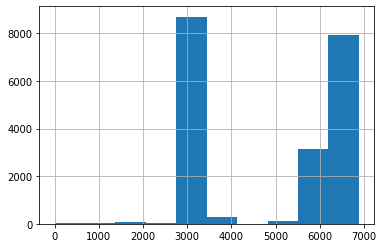

In [3]:
eda.fraud_records.acqic.hist()

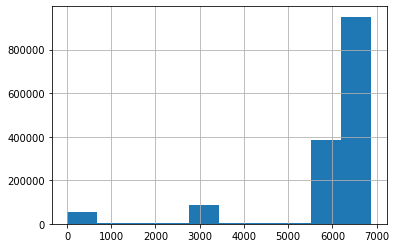

In [4]:
eda.not_fraud_records.acqic.hist()

#### 各組金額統計量

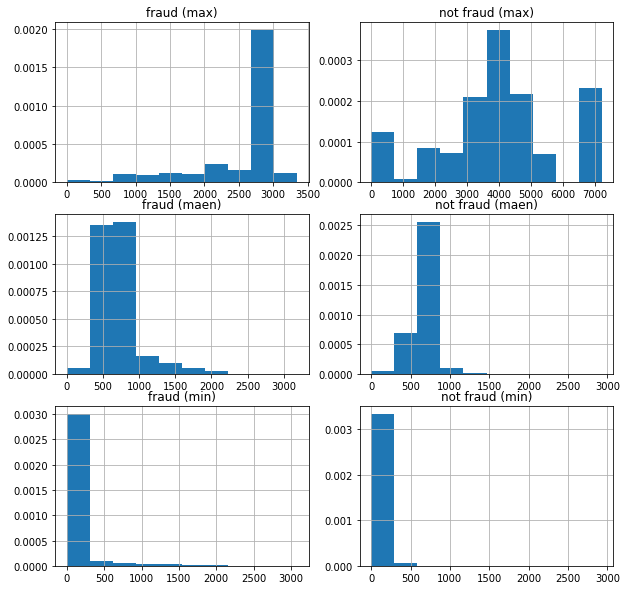

In [3]:
eda.group_stat_hist(group_colname='acqic', stat_colname='conam')

## (2) bacno 歸戶帳號 
* 根據身分證
* 歸戶帳號下可能有多的卡號

### 檢查train/test重複程度
* 發現只有3128個帳號有交集(交集率低)，其中有495個帳號(約2.43%)為盜刷，高於整體盜刷率

In [11]:
eda.check_na('bacno')

Train :  [False]
Test  :  [False]


In [12]:
eda.get_num_intersection('bacno')

Number of intersection category: 3128
Intersection Ratio : 
Train : 0.03285231163484362
Test  : 0.04399499289722781


In [13]:
eda.get_target_ratio('bacno', eda.get_intersection('bacno'))

495 fraud records.
fraud rate : 0.02431834929992631


In [6]:
eda.get_target_category_by_column('bacno', 10)

[(36103, 94),
 (156870, 85),
 (159452, 82),
 (118402, 79),
 (140259, 75),
 (46582, 65),
 (77441, 63),
 (91688, 62),
 (107667, 61),
 (97832, 56)]

#### 各組金額統計量

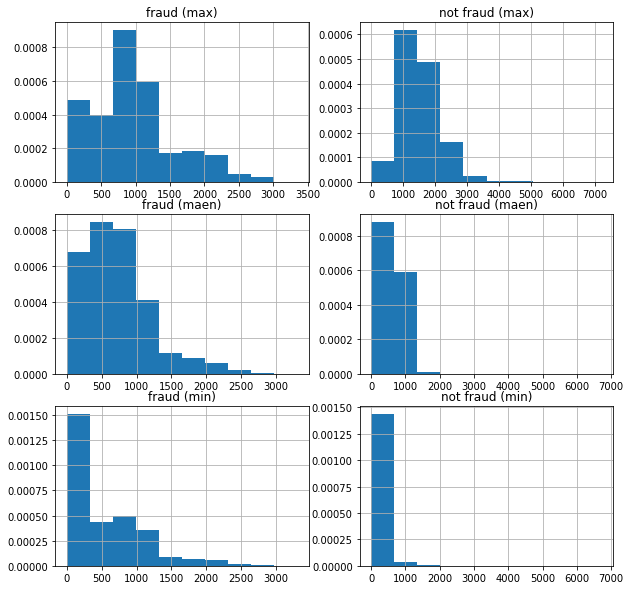

In [4]:
eda.group_stat_hist(group_colname='bacno', stat_colname='conam')

#### 各組時間統計量

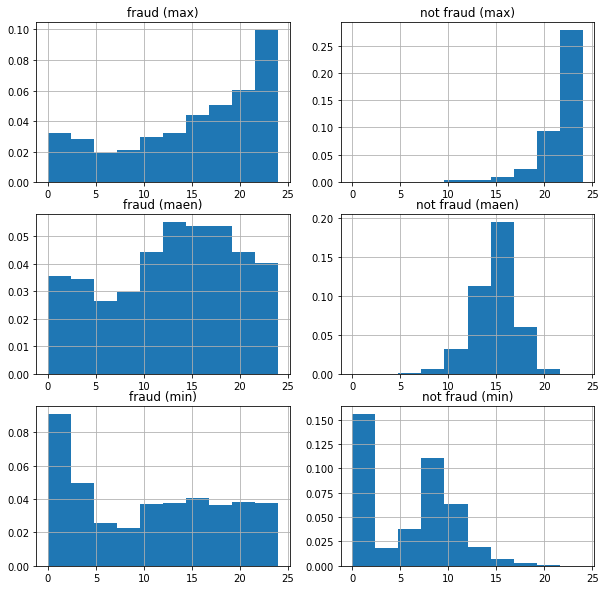

In [3]:
eda.group_stat_hist(group_colname='bacno', stat_colname='time')

In [21]:
# from collections import Counter
# def counter(arr):
#     return list[Counter(arr.values).most_common(1)] # 返回出现频率最高的两个数

# counter(eda.fraud_records[group_colname])

In [22]:
# group_colname = 'bacno'
# stat_colname = 'time'


# fig , ax = plt.subplots(1, 2, figsize=(10, 3))
# ax[0].hist(eda.fraud_records.groupby(group_colname)[stat_colname].transform(counter), density=True)
# ax[0].set_title('fraud (count)')
# ax[0].grid()

# ax[1].hist(eda.not_fraud_records.groupby(group_colname)[stat_colname].transform(counter), density=True)
# ax[1].set_title('fraud (count)')
# ax[1].grid()

#### 差集

In [7]:
train_set = set(np.unique(eda.train_data['bacno']))
test_set = set(np.unique(eda.test_data['bacno']))

print(len(train_set - test_set))
print(len(test_set - train_set))

92086
67971


## (3) cano 交易卡號
* 會有重複交易的卡號
* 有8730種盜刷卡號

### 檢查train/test重複程度
* 發現有3763個卡號有交集(交集率低)，其中有495個帳號(約1.08%)為盜刷，低於整體盜刷率

In [21]:
eda.check_na('cano')

Train :  [False]
Test  :  [False]


In [14]:
eda.get_num_intersection('cano')

Number of intersection category: 3763
Intersection Ratio : 
Train : 0.029077449715252716
Test  : 0.04334853930513317


In [15]:
eda.get_target_ratio('cano', eda.get_intersection('cano'))

220 fraud records.
fraud rate : 0.010808155244411692


#### 差集

In [8]:
train_set = set(np.unique(eda.train_data['cano']))
test_set = set(np.unique(eda.test_data['cano']))

print(len(train_set - test_set))
print(len(test_set - train_set))

125650
83045


## (4) conam 交易金額-台幣(經過轉換) 
* 偏鋒
* 盜刷與非盜刷交易金額分布很不同
* 盜刷多為小金額，最高3353.25

In [22]:
eda.check_na('conam')

Train :  [False]
Test  :  [False]


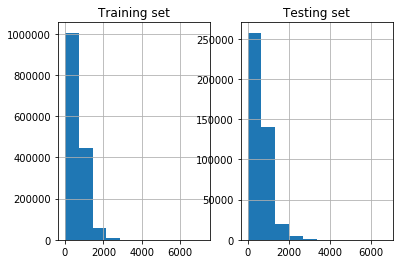

In [16]:
eda.hist('conam')

In [18]:
print(eda.fraud_records.conam.max())
print(eda.not_fraud_records.conam.max())

3353.25
7208.77


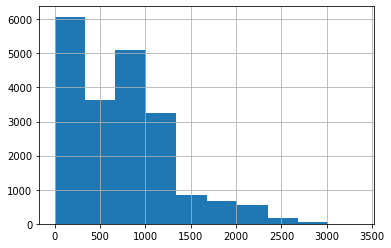

In [10]:
eda.fraud_records.conam.hist()

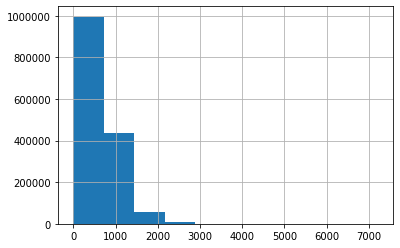

In [11]:
eda.not_fraud_records.conam.hist()

## (5) contp 交易類別
* 集中在5、4

In [23]:
eda.check_na('contp')

Train :  [False]
Test  :  [False]


In [24]:
eda.get_num_unique('contp')

Colname :　contp
Number of train unique : 7
Number of test unique  : 7


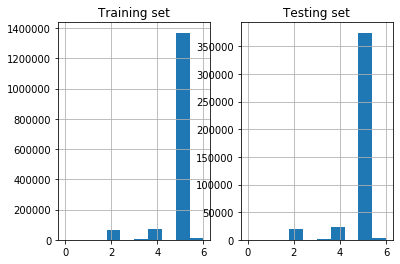

In [45]:
eda.hist('contp')

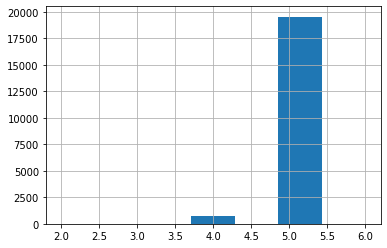

In [12]:
eda.fraud_records.contp.hist(bins=7)

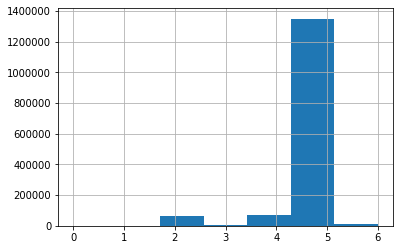

In [26]:
eda.not_fraud_records.contp.hist(bins=7)

#### 各組金額統計量
* max、min分布差異大

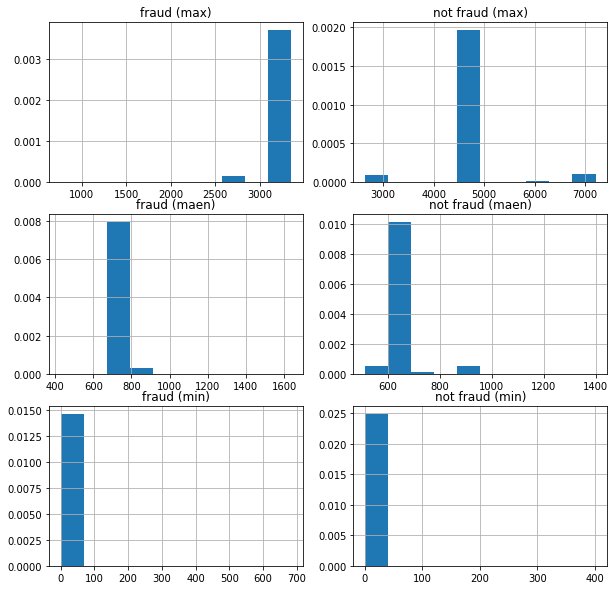

In [5]:
eda.group_stat_hist(group_colname='contp', stat_colname='conam')

In [28]:
eda.get_target_category_by_column('contp', 10)

[(5, 19553), (4, 777), (3, 14), (2, 8), (6, 3)]

## (6) csmcu 消費地幣別 
* 只有62、61有盜刷紀錄較多
* 有45種幣別有盜刷紀錄
* 盜刷率高的幣別的消費金額較低

### feature engineering
* taget encoding
* 45種以外歸類不同
* groupby + max money

In [51]:
eda.check_na('csmcu')

Train :  [False]
Test  :  [False]


In [29]:
csmcu_counter_train = Counter(eda.train_data.csmcu.values)
print('Train : ')
print(csmcu_counter_train.most_common(10))

csmcu_counter_test = Counter(eda.test_data.csmcu.values)
print('Test')
print(csmcu_counter_test.most_common(10))

Train : 
[(62, 1246042), (0, 176278), (61, 34160), (13, 17376), (75, 12581), (26, 12373), (71, 7371), (60, 3550), (4, 1606), (20, 1542)]
Test
[(62, 342492), (0, 49513), (61, 10687), (13, 5830), (75, 3715), (26, 3378), (71, 2066), (60, 671), (4, 502), (29, 437)]


In [30]:
eda.get_num_unique('csmcu')

Colname :　csmcu
Number of train unique : 72
Number of test unique  : 57


In [31]:
eda.get_num_intersection('csmcu')

Number of intersection category: 53
Intersection Ratio : 
Train : 0.7361111111111112
Test  : 0.9298245614035088


In [32]:
eda.get_target_ratio('csmcu', eda.get_intersection('csmcu'))

41 fraud records.
fraud rate : 0.00201424711373127


In [33]:
eda.get_target_category_by_column('csmcu', 10)

[(62, 8947),
 (61, 6885),
 (60, 1082),
 (71, 631),
 (26, 626),
 (4, 530),
 (10, 457),
 (20, 245),
 (75, 195),
 (0, 190)]

[]

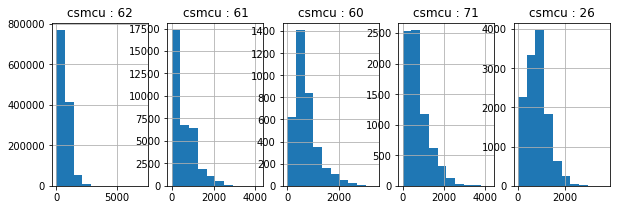

In [48]:
fig , ax = plt.subplots(1, 5, figsize=(10, 3))
ax[0].set_title('csmcu : 62')
ax[0].hist(eda.train_data.groupby('csmcu').get_group(62).conam.dropna())
ax[0].grid()
ax[1].set_title('csmcu : 61')
ax[1].hist(eda.train_data.groupby('csmcu').get_group(61).conam.dropna())
ax[1].grid()
ax[2].set_title('csmcu : 60')
ax[2].hist(eda.train_data.groupby('csmcu').get_group(60).conam.dropna())
ax[2].grid()
ax[3].set_title('csmcu : 71')
ax[3].hist(eda.train_data.groupby('csmcu').get_group(71).conam.dropna())
ax[3].grid()
ax[4].set_title('csmcu : 26')
ax[4].hist(eda.train_data.groupby('csmcu').get_group(26).conam.dropna())
ax[4].grid()
plt.plot()

#### 各組金額統計量

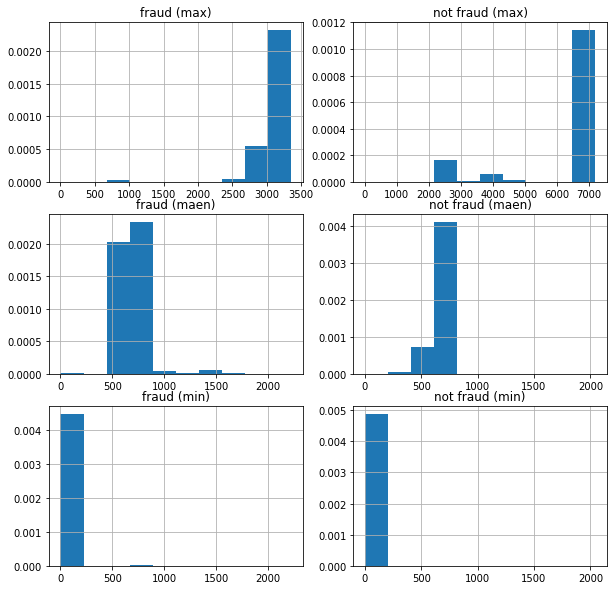

In [39]:
eda.group_stat_hist(group_colname='csmcu', stat_colname='conam')

#### 差集

In [7]:
train_set = set(np.unique(eda.train_data['csmcu']))
test_set = set(np.unique(eda.test_data['csmcu']))

print(len(train_set - test_set))
print(len(test_set - train_set))

19
4


## (7) ecfg 網路交易註記
* 大多盜刷紀錄都是網路交易

In [50]:
eda.check_na('ecfg')

Train :  [False]
Test  :  [False]


In [49]:
eda.get_num_unique('ecfg')

Colname :　ecfg
Number of train unique : 2
Number of test unique  : 2


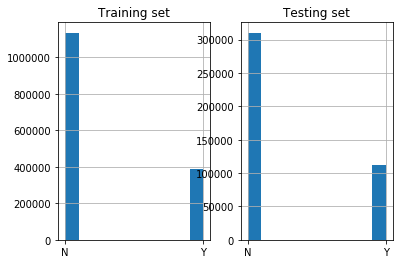

In [52]:
eda.hist('ecfg')

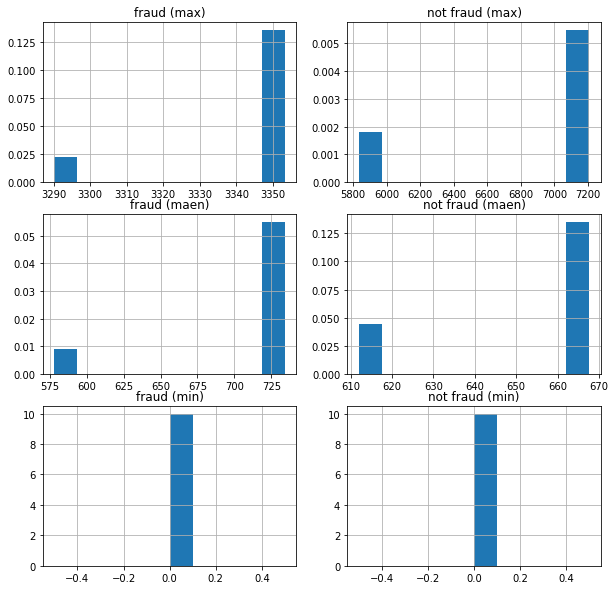

In [6]:
eda.group_stat_hist(group_colname='ecfg', stat_colname='conam')

In [ ]:
eda.group_stat_hist(group_colname='ecfg', stat_colname='conam')

In [53]:
eda.get_target_category_by_column('ecfg')

[('Y', 17493), ('N', 2862)]

## (8) etymd 交易型態
* 大部分盜刷交易型態為 8、2

In [54]:
eda.check_na('etymd')

Train :  [False]
Test  :  [False]


In [55]:
eda.get_num_unique('etymd')

Colname :　etymd
Number of train unique : 11
Number of test unique  : 11


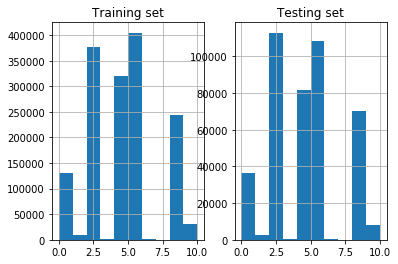

In [56]:
eda.hist('etymd')

In [57]:
eda.get_target_category_by_column('etymd')

[(8, 11568),
 (2, 7804),
 (5, 203),
 (0, 183),
 (4, 175),
 (9, 170),
 (6, 145),
 (7, 67),
 (1, 23),
 (3, 17)]

## (9) flbmk Fallback 註記 
* 有na
* 幾乎都是N
* 比例上來看na和Y的盜刷率高

In [58]:
eda.check_na('flbmk')

Train :  [False  True]
Test  :  [False  True]


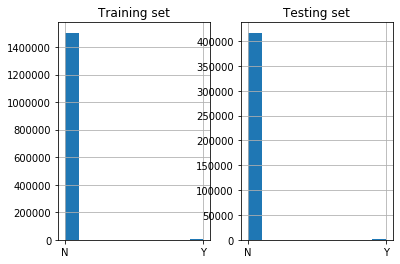

In [59]:
eda.hist('flbmk')

In [60]:
eda.get_target_category_by_column('flbmk')

[('N', 20073), (nan, 195), ('Y', 87)]

In [61]:
print(20073 / 195)
print(20073 / 87)

102.93846153846154
230.72413793103448


## (10) flg_3dsmk 3DS 交易註記 
* 有na
* na數和flbmk一樣
* 大多為N

In [62]:
eda.check_na('flg_3dsmk')

Train :  [False  True]
Test  :  [False  True]


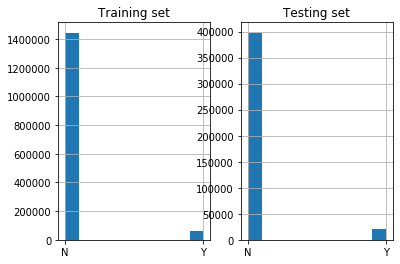

In [63]:
eda.hist('flg_3dsmk')

In [64]:
eda.get_target_category_by_column('flg_3dsmk')

[('N', 20060), (nan, 195), ('Y', 100)]

In [65]:
flg_3dsmk_counter = Counter(eda.train_data.flg_3dsmk)
flg_3dsmk_counter.most_common()

[('N', 1444867), ('Y', 64339), (nan, 12581)]

In [66]:
print(1444867 / 64339)
print(1444867 / 12581)

22.45709445282022
114.84516334154678


In [67]:
print(20060 / 195)
print(20060 / 100)

102.87179487179488
200.6


## (11) 支付形態 
* test多了類別4 (有十筆)
* 盜刷幾乎都是類別5

In [69]:
eda.check_na('hcefg')

Train :  [False]
Test  :  [False]


In [68]:
eda.get_num_unique('hcefg')

Colname :　hcefg
Number of train unique : 9
Number of test unique  : 10


In [70]:
len(eda.test_data.hcefg[eda.test_data.hcefg == 4])

10

In [71]:
eda.get_target_category_by_column('hcefg')

[(5, 20109), (6, 195), (1, 26), (0, 21), (7, 4)]

## (12) insfg 分期交易註記 
* 盜刷紀錄中大多為N

In [72]:
eda.check_na('insfg')

Train :  [False]
Test  :  [False]


In [73]:
eda.get_num_unique('insfg')

Colname :　insfg
Number of train unique : 2
Number of test unique  : 2


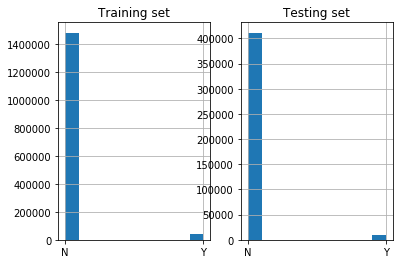

In [74]:
eda.hist('insfg')

In [77]:
insfg_counter = Counter(eda.train_data.insfg)
insfg_counter.most_common()

[('N', 1479475), ('Y', 42312)]

In [78]:
1479475 / 42312

34.96584893174513

In [79]:
eda.get_target_category_by_column('insfg')

[('N', 20318), ('Y', 37)]

In [80]:
20318 / 37

549.1351351351351

## (13) iterm 分期期數 
* 盜刷幾乎都是0類別

### TODO 
* 觀察2、3、4類別特徵

In [81]:
eda.check_na('iterm')

Train :  [False]
Test  :  [False]


In [82]:
eda.get_num_unique('iterm')

Colname :　iterm
Number of train unique : 9
Number of test unique  : 9


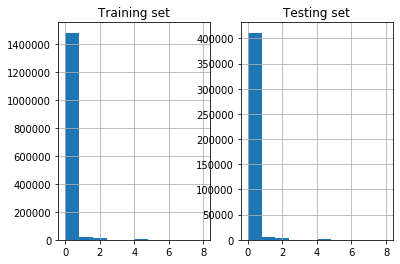

In [83]:
eda.hist('iterm')

In [93]:
eda.get_target_category_by_column('iterm')

[(0, 20318), (2, 34), (1, 2), (4, 1)]

## (14) locdt 授權日期 
* 訓練集的授權日期為1~90，共90天的信用卡授權交易紀錄

## (15) loctm 授權時間 
* 需轉換
* 盜刷與非盜刷時間分布不一樣

In [85]:
eda.check_na('loctm')

Train :  [False]
Test  :  [False]


In [86]:
eda.get_num_unique('loctm')

Colname :　loctm
Number of train unique : 84810
Number of test unique  : 75210


In [87]:
print(np.max(np.unique(eda.train_data.loctm.values)))
print(np.min(np.unique(eda.train_data.loctm.values)))

235959.0
0.0


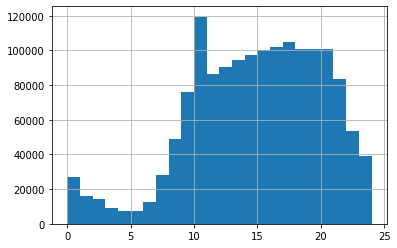

In [90]:
eda.train_data.loctm.apply(eda.convert_time).hist(bins=24)

In [126]:
eda.train_data.loctm.apply(eda.convert_time)

0          17.4478
1          10.8539
2          15.4161
3          17.4961
4          18.3581
            ...   
1521782    19.2783
1521783    10.3939
1521784    23.7717
1521785    21.8717
1521786    16.6008
Name: loctm, Length: 1521787, dtype: float64

#### 盜刷時間分布
* 集中在半夜

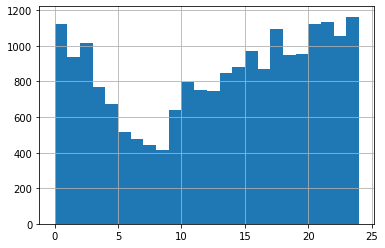

In [91]:
eda.fraud_records.loctm.apply(eda.convert_time).hist(bins=24)

#### 非盜刷時間分布

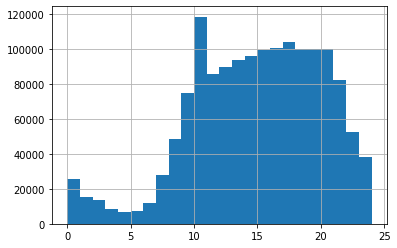

In [92]:
eda.not_fraud_records.loctm.apply(eda.convert_time).hist(bins=24)

## (16) mcc MCC_CODE 

In [95]:
eda.check_na('mcc')

Train :  [False]
Test  :  [False]


In [94]:
eda.get_num_unique('mcc')

Colname :　mcc
Number of train unique : 434
Number of test unique  : 372


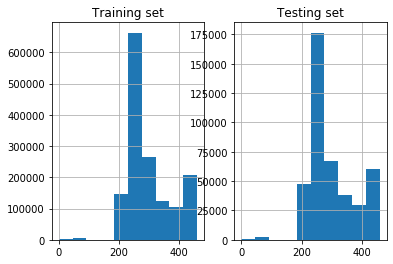

In [96]:
eda.hist('mcc')

In [97]:
eda.get_target_ratio('mcc', eda.get_intersection('mcc'))

184 fraud records.
fraud rate : 0.00903954802259887


In [98]:
mcc_counter = Counter(eda.train_data.mcc)
mcc_counter.most_common(10)

[(251, 193332),
 (247, 141106),
 (263, 108297),
 (457, 103307),
 (292, 74036),
 (264, 65846),
 (343, 60033),
 (451, 44515),
 (380, 43252),
 (289, 39989)]

In [99]:
eda.get_target_category_by_column('mcc', 10)

[(289, 3789),
 (380, 3403),
 (288, 2631),
 (192, 2623),
 (203, 490),
 (337, 414),
 (286, 410),
 (296, 382),
 (408, 375),
 (277, 366)]

#### 差集

In [26]:
train_set = set(np.unique(eda.train_data['mcc']))
test_set = set(np.unique(eda.test_data['mcc']))

print(len(train_set - test_set))
print(len(test_set - train_set))

88
26


## (17) mchno 特店代號
* 有交集的類別有4%的盜刷率
* 盜刷可能集中在少數店家

In [100]:
eda.get_num_unique('mchno')

Colname :　mchno
Number of train unique : 89316
Number of test unique  : 45501


In [101]:
len(eda.get_union('mchno'))

102783

In [102]:
eda.get_target_ratio('mchno', eda.get_intersection('mchno'))

827 fraud records.
fraud rate : 0.04062883812331122


In [103]:
eda.get_target_category_by_column('mchno', 10)

[(54238, 3289),
 (54828, 2681),
 (55807, 2189),
 (45597, 1103),
 (67588, 791),
 (66634, 738),
 (20984, 330),
 (11801, 241),
 (69240, 208),
 (79663, 191)]

#### 差集

In [23]:
train_set = set(np.unique(eda.train_data['mchno']))
test_set = set(np.unique(eda.test_data['mchno']))

print(len(train_set - test_set))
print(len(test_set - train_set))

57282
13467


### (18) ovrlt 超額註記碼
* 盜刷的N/Y比較低

In [104]:
eda.check_na('ovrlt')

Train :  [False]
Test  :  [False]


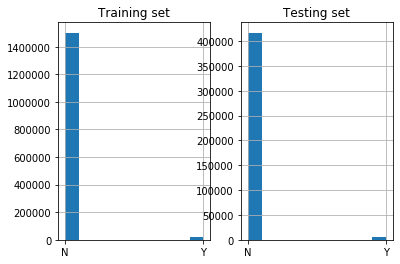

In [105]:
eda.hist('ovrlt')

In [106]:
eda.get_target_category_by_column('ovrlt')

[('N', 19720), ('Y', 635)]

In [107]:
ovrlt_counter = Counter(eda.train_data.ovrlt)
ovrlt_counter.most_common()

[('N', 1501536), ('Y', 20251)]

In [108]:
1501536 / 20251

74.14626438200582

## (19) scity 消費城市
* 1908個類別交集，這消類別的盜刷率為2.5%

In [109]:
eda.check_na('scity')

Train :  [False]
Test  :  [False]


In [110]:
eda.get_num_unique('scity')

Colname :　scity
Number of train unique : 5698
Number of test unique  : 2857


In [111]:
eda.get_target_ratio('scity', eda.get_intersection('scity'))

509 fraud records.
fraud rate : 0.025006140997297963


In [112]:
eda.get_target_category_by_column('scity', 20)

[(6580, 5657),
 (3460, 2682),
 (6593, 1545),
 (1337, 1103),
 (0, 801),
 (5817, 697),
 (5320, 518),
 (621, 480),
 (5932, 334),
 (1803, 260),
 (6576, 238),
 (1034, 187),
 (4528, 141),
 (1060, 139),
 (955, 139),
 (3150, 105),
 (668, 101),
 (376, 101),
 (3441, 90),
 (5324, 88)]

#### 差集

In [24]:
train_set = set(np.unique(eda.train_data['scity']))
test_set = set(np.unique(eda.test_data['scity']))

print(len(train_set - test_set))
print(len(test_set - train_set))

3790
949


## (20) stocn 消費地國別 

### 檢查train/test重複程度
* 發現有81個國別有交集，其中只有55個帳號(約0.27%)為盜刷
* 有test獨有的類別

### feature engineering
* target encoding效果可能有限

In [113]:
eda.check_na('stocn')

Train :  [False]
Test  :  [False]


In [114]:
eda.get_num_unique('stocn')

Colname :　stocn
Number of train unique : 103
Number of test unique  : 87


In [115]:
len(eda.get_intersection('stocn'))

81

In [116]:
len(eda.get_union('stocn'))

109

In [117]:
eda.get_target_ratio('stocn', eda.get_intersection('stocn'))

55 fraud records.
fraud rate : 0.002702038811102923


In [25]:
train_set = set(np.unique(eda.train_data['stocn']))
test_set = set(np.unique(eda.test_data['stocn']))

print(len(train_set - test_set))
print(len(test_set - train_set))

22
6


## (21) stscd 狀態碼 

In [118]:
eda.check_na('stscd')

Train :  [False]
Test  :  [False]


In [119]:
eda.get_num_unique('stscd')

Colname :　stscd
Number of train unique : 5
Number of test unique  : 5


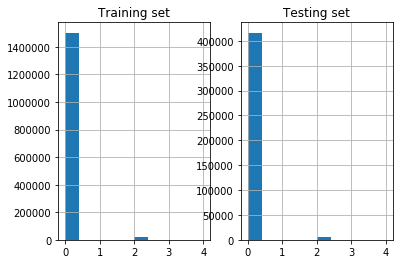

In [120]:
eda.hist('stscd')

In [121]:
stscd_counter = Counter(eda.train_data.stscd)
stscd_counter.most_common()

[(0, 1502745), (2, 18506), (1, 408), (3, 108), (4, 20)]

In [122]:
eda.get_target_category_by_column('stscd', 20)

[(0, 14679), (2, 5651), (1, 25)]

## (22) txkey 交易序號 
* 完全沒交集

In [27]:
eda.train_data.txkey

0           516056
1             4376
2           483434
3          1407164
4          1051004
            ...   
1521782    1478280
1521783     661087
1521784     167073
1521785     338215
1521786    1055258
Name: txkey, Length: 1521787, dtype: int64

In [123]:
eda.check_na('txkey')

Train :  [False]
Test  :  [False]


In [124]:
eda.get_num_unique('txkey')

Colname :　txkey
Number of train unique : 1521787
Number of test unique  : 421665


In [125]:
eda.get_intersection('txkey')

set()